# Transactions cleaning

In [1]:
import os
import pandas as pd
import numpy as np
from collections import Counter

# Plot libraries
import matplotlib.pyplot as plt
import seaborn as sns
color = sns.color_palette()

# Random seed for reproducibility
seed = 202
np.random.seed(seed)

# Ignore warnings
import warnings
warnings.simplefilter('ignore')

# Garbage collector
import gc
gc.enable()

### Import the dataframe

In [2]:
historical_transactions_df = pd.read_csv("historical_transactions.csv")
historical_transactions_df.shape

(29112361, 14)

In [3]:
new_transactions_df = pd.read_csv("new_merchant_transactions.csv")
new_transactions_df.shape

(1963031, 14)

In [4]:
transactions_df = pd.concat([historical_transactions_df, new_transactions_df])
transactions_df.shape

(31075392, 14)

In [5]:
transactions_df.head()

,authorized_flag,card_id,city_id,category_1,installments,category_3,merchant_category_id,merchant_id,month_lag,purchase_amount,purchase_date,category_2,state_id,subsector_id
0,Y,C_ID_4e6213e9bc,88,N,0,A,80,M_ID_e020e9b302,-8,-0.703331,2017-06-25 15:33:07,1.0,16,37
1,Y,C_ID_4e6213e9bc,88,N,0,A,367,M_ID_86ec983688,-7,-0.733128,2017-07-15 12:10:45,1.0,16,16
2,Y,C_ID_4e6213e9bc,88,N,0,A,80,M_ID_979ed661fc,-6,-0.720386,2017-08-09 22:04:29,1.0,16,37
3,Y,C_ID_4e6213e9bc,88,N,0,A,560,M_ID_e6d5ae8ea6,-5,-0.735352,2017-09-02 10:06:26,1.0,16,34
4,Y,C_ID_4e6213e9bc,88,N,0,A,80,M_ID_e020e9b302,-11,-0.722865,2017-03-10 01:14:19,1.0,16,37


In [6]:
transactions_df.isnull().sum()

authorized_flag               0
card_id                       0
city_id                       0
category_1                    0
installments                  0
category_3               234081
merchant_category_id          0
merchant_id              164697
month_lag                     0
purchase_amount               0
purchase_date                 0
category_2              2764609
state_id                      0
subsector_id                  0
dtype: int64

In [15]:
def cat_plot(df, col):
    cnt_srs = df[col].value_counts()
    cnt_srs = cnt_srs.sort_index()
    plt.figure(figsize=(14,6))
    sns.barplot(cnt_srs.index, cnt_srs.values, alpha=0.8, color='green')
    plt.xticks(rotation='vertical')
    plt.xlabel('First active month', fontsize=12)
    plt.ylabel('Number of cards', fontsize=12)
    plt.title("First active month count in train set")
    plt.show()

### Feature cleaning

#### authorized_flag

In [7]:
print(Counter(transactions_df['authorized_flag']))

Counter({'Y': 28558483, 'N': 2516909})


In [8]:
# Change to boolean
transactions_df = transactions_df.replace({'authorized_flag': {'Y': True, 'N': False}})

In [9]:
print(Counter(transactions_df['authorized_flag']))

Counter({True: 28558483, False: 2516909})


#### card_id

In [13]:
# Check if there are common card_id between train and test and if this value has more than one occurrence in the sets
print("Number of unique card_id in transactions set :",transactions_df.card_id.nunique(), " out of rows : ",transactions_df.shape[0])
print("Number of common card_id in train and transactions set (train unique card_id: %d): %d" % (train_df.shape[0],len(set(transactions_df.card_id.unique()).intersection(set(train_df.card_id.unique())))))
print("Number of common card_id in test and transactions set (test unique card_id: %d): %d" % (test_df.shape[0],len(set(transactions_df.card_id.unique()).intersection(set(test_df.card_id.unique())))))

Number of unique card_id in transactions set : 325540  out of rows :  31075392


NameError: name 'train_df' is not defined

#### category_1

In [10]:
print(Counter(transactions_df['category_1']))

Counter({'N': 28928267, 'Y': 2147125})


In [12]:
# Change to boolean
transactions_df = transactions_df.replace({'category_1': {'Y': True, 'N': False}})

TypeError: Cannot compare types 'ndarray(dtype=bool)' and 'str'

In [13]:
print(Counter(transactions_df['category_1']))

Counter({False: 28928267, True: 2147125})


#### installments

In [14]:
print(Counter(transactions_df['installments']))

Counter({0: 16333991, 1: 12513700, 2: 721145, 3: 582957, -1: 234081, 4: 194340, 6: 143023, 10: 127726, 5: 125386, 12: 57914, 8: 22029, 7: 11769, 9: 6250, 11: 891, 999: 190})


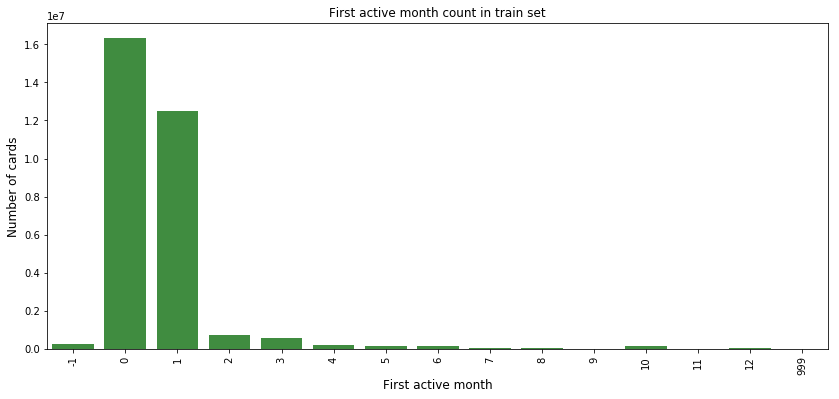

In [16]:
cat_plot(transactions_df, 'installments')

In [12]:
# We must decide how to handle with -1 and 999

#### category_3

In [18]:
print(Counter(transactions_df['category_3']))

Counter({'A': 16333991, 'B': 12513700, 'C': 1993620, nan: 234081})


In [19]:
transactions_df['category_3'].fillna('D', inplace=True)

In [20]:
print(Counter(transactions_df['category_3']))

Counter({'A': 16333991, 'B': 12513700, 'C': 1993620, 'D': 234081})


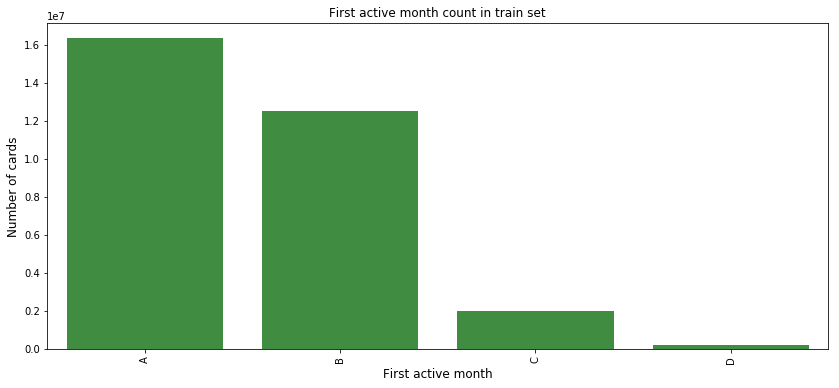

In [21]:
cat_plot(transactions_df, 'category_3')

#### month_lag 
Number of months of delay before payment

In [22]:
print(Counter(transactions_df['month_lag']))

Counter({-2: 3857276, -1: 3627430, 0: 3470946, -3: 3095651, -4: 2639805, -5: 2364790, -6: 2050048, -7: 1769844, -8: 1427846, -9: 1234724, -10: 1085053, 1: 1027617, -11: 1007878, 2: 935414, -12: 791973, -13: 689097})


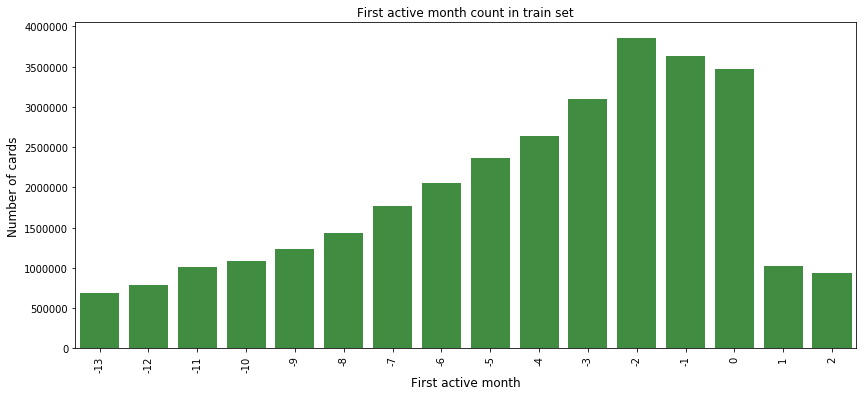

In [23]:
cat_plot(transactions_df, 'month_lag')

#### purchase_amount

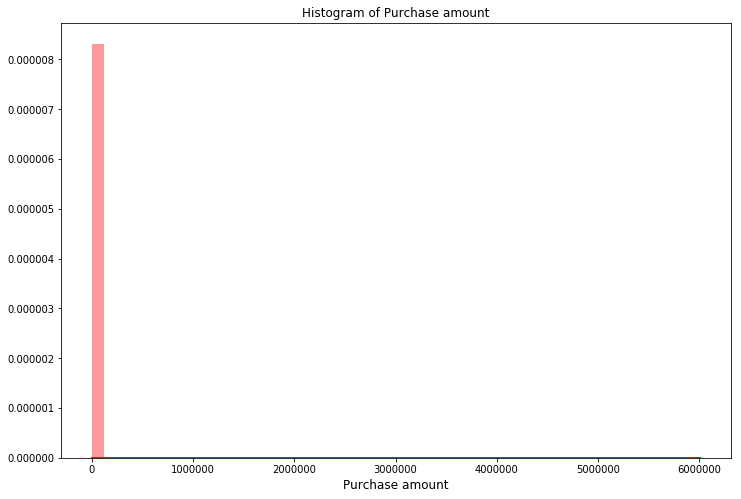

In [24]:
plt.figure(figsize=(12,8))
sns.distplot(transactions_df['purchase_amount'].values, color="red")
plt.title("Histogram of Purchase amount")
plt.xlabel('Purchase amount', fontsize=12)
plt.show()

In [25]:
print(min(transactions_df['purchase_amount'].values),max(transactions_df['purchase_amount'].values))

-0.7469078 6010603.9717525


#### purchase_date

In [26]:
purchase_date = pd.to_datetime(transactions_df['purchase_date'], errors='coerce')
transactions_df['purchase_date'] = purchase_date.dt.date
transactions_df['purchase_month_year'] = purchase_date.dt.to_period('M')

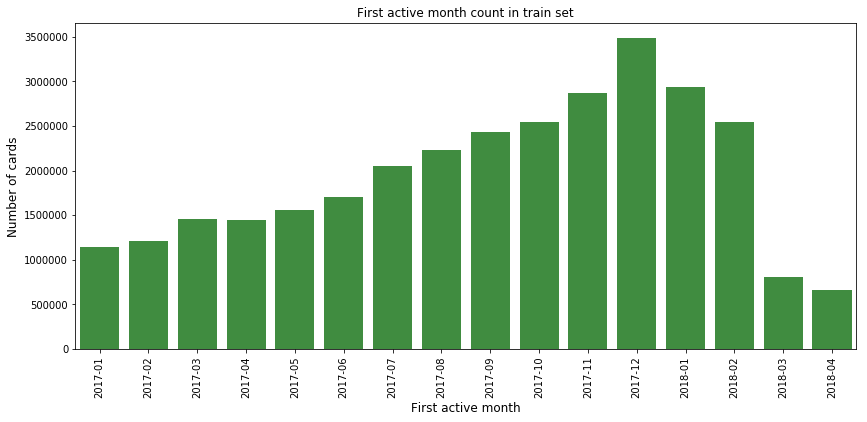

In [28]:
cat_plot(transactions_df, 'purchase_month_year')

#### purchase_amount

#### category_2

In [29]:
print(len(np.unique(transactions_df['category_2'].astype(str))))

6


In [30]:
print(min(transactions_df['category_2'].values),max(transactions_df['category_2'].values))

1.0 5.0


In [31]:
transactions_df['category_2'].fillna(6.0, inplace=True)

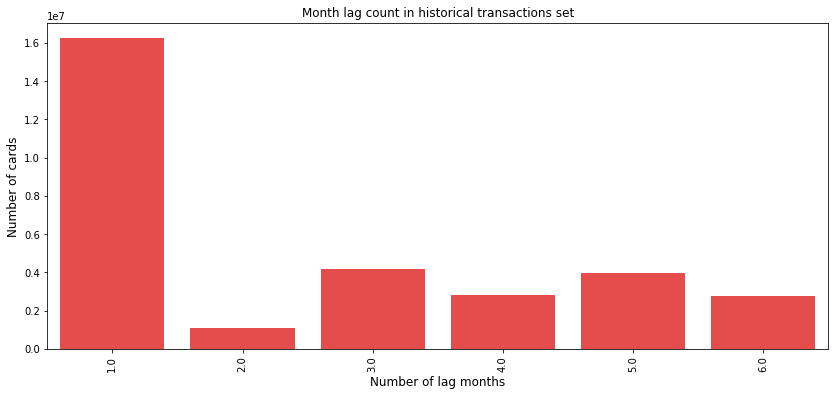

In [37]:
cnt_srs = transactions_df['category_2'].value_counts()
cnt_srs = cnt_srs.sort_index()
plt.figure(figsize=(14,6))
sns.barplot(cnt_srs.index, cnt_srs.values, alpha=0.8, color='red')
plt.xticks(rotation='vertical')
plt.xlabel('Number of lag months', fontsize=12)
plt.ylabel('Number of cards', fontsize=12)
plt.title("Month lag count in historical transactions set")
plt.show()

#### state_id

In [32]:
print(Counter(transactions_df['state_id']))

Counter({9: 11302027, -1: 2764609, 16: 2283185, 15: 2237559, 5: 1775282, 19: 1292267, 20: 1220150, 22: 1037014, 21: 989749, 4: 904352, 7: 690054, 11: 678032, 13: 673438, 3: 581128, 12: 412670, 18: 407015, 2: 399542, 1: 265661, 10: 239736, 23: 219080, 24: 218777, 14: 181839, 8: 170047, 17: 124589, 6: 7590})


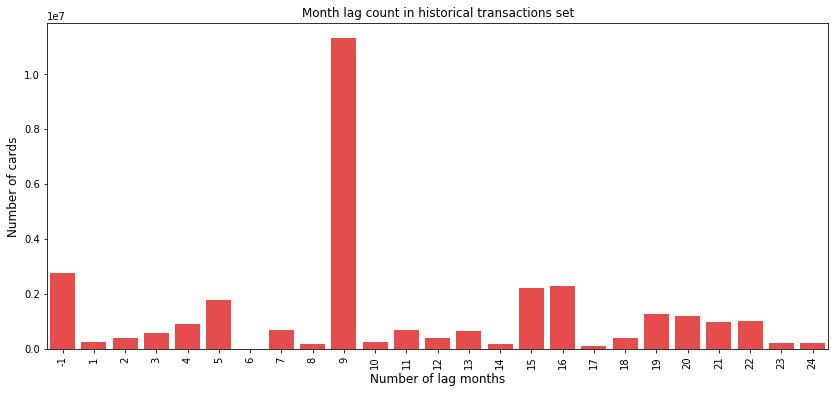

In [38]:
cnt_srs = transactions_df['state_id'].value_counts()
cnt_srs = cnt_srs.sort_index()
plt.figure(figsize=(14,6))
sns.barplot(cnt_srs.index, cnt_srs.values, alpha=0.8, color='red')
plt.xticks(rotation='vertical')
plt.xlabel('Number of lag months', fontsize=12)
plt.ylabel('Number of cards', fontsize=12)
plt.title("Month lag count in historical transactions set")
plt.show()

#### subsector_id

In [33]:
print(Counter(transactions_df['subsector_id']))

Counter({33: 5766731, 37: 4871808, 19: 3347968, 29: 2951134, 34: 2943131, 27: 1853278, 16: 1770681, 21: 911788, 7: 766122, 1: 762176, 15: 695406, 8: 556489, 18: 437758, 36: 368317, 20: 337734, 30: 323778, 25: 282858, 39: 280693, 12: 213418, 41: 208966, 22: 195712, 31: 157945, 17: 156148, 32: 146189, 2: 126447, 38: 102062, 3: 94090, 10: 91803, 9: 85350, 4: 63404, 35: 44502, 26: 27361, 13: 25807, 5: 24487, 14: 23313, 23: 21147, 24: 20041, 40: 14377, 11: 2569, -1: 2272, 28: 132})


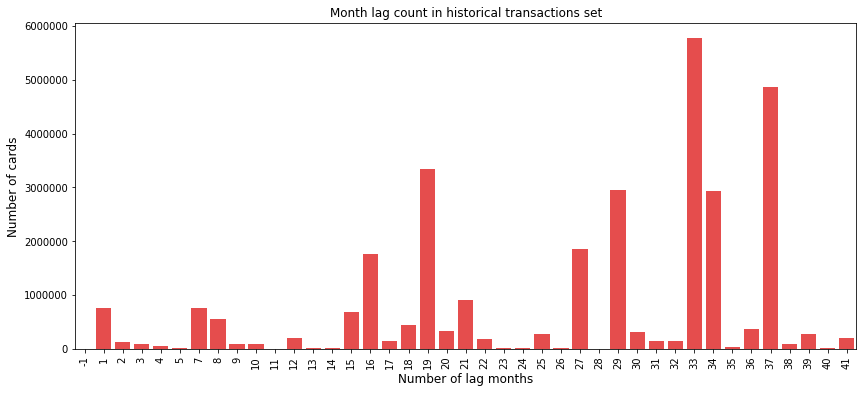

In [40]:
cnt_srs = transactions_df['subsector_id'].value_counts()
cnt_srs = cnt_srs.sort_index()
plt.figure(figsize=(14,6))
sns.barplot(cnt_srs.index, cnt_srs.values, alpha=0.8, color='red')
plt.xticks(rotation='vertical')
plt.xlabel('Number of lag months', fontsize=12)
plt.ylabel('Number of cards', fontsize=12)
plt.title("Month lag count in historical transactions set")
plt.show()

#### merchant_id

In [34]:
transactions_df.dropna(subset=['merchant_id'], inplace=True)

### Checkpoint

In [35]:
transactions_df.head()

,authorized_flag,card_id,city_id,category_1,installments,category_3,merchant_category_id,merchant_id,month_lag,purchase_amount,purchase_date,category_2,state_id,subsector_id,purchase_month_year
0,True,C_ID_4e6213e9bc,88,False,0,A,80,M_ID_e020e9b302,-8,-0.703331,2017-06-25,1.0,16,37,2017-06
1,True,C_ID_4e6213e9bc,88,False,0,A,367,M_ID_86ec983688,-7,-0.733128,2017-07-15,1.0,16,16,2017-07
2,True,C_ID_4e6213e9bc,88,False,0,A,80,M_ID_979ed661fc,-6,-0.720386,2017-08-09,1.0,16,37,2017-08
3,True,C_ID_4e6213e9bc,88,False,0,A,560,M_ID_e6d5ae8ea6,-5,-0.735352,2017-09-02,1.0,16,34,2017-09
4,True,C_ID_4e6213e9bc,88,False,0,A,80,M_ID_e020e9b302,-11,-0.722865,2017-03-10,1.0,16,37,2017-03


In [36]:
transactions_df.isnull().sum()

authorized_flag         0
card_id                 0
city_id                 0
category_1              0
installments            0
category_3              0
merchant_category_id    0
merchant_id             0
month_lag               0
purchase_amount         0
purchase_date           0
category_2              0
state_id                0
subsector_id            0
purchase_month_year     0
dtype: int64

### Export cleaned dataframe

In [37]:
transactions_df.to_csv('(1)transactions.csv', index = False)

## Merchants

In [3]:
merchants_df = pd.read_csv("(1)merchant.csv")
merchants_df.shape

(334683, 22)

In [4]:
merchants_df.head()

,merchant_id,merchant_group_id,merchant_category_id,subsector_id,numerical_1,numerical_2,category_1,most_recent_sales_range,most_recent_purchases_range,avg_sales_lag3,...,avg_sales_lag6,avg_purchases_lag6,active_months_lag6,avg_sales_lag12,avg_purchases_lag12,active_months_lag12,category_4,city_id,state_id,category_2
0,M_ID_838061e48c,8353,792,9,-0.057471,-0.057471,False,E,E,-0.40,...,-2.25,18.666667,6,-2.32,13.916667,12,False,242,9,1.0
1,M_ID_9339d880ad,3184,840,20,-0.057471,-0.057471,False,E,E,-0.72,...,-0.74,1.291667,6,-0.57,1.687500,12,False,22,16,1.0
2,M_ID_e726bbae1e,447,690,1,-0.057471,-0.057471,False,E,E,-82.13,...,-82.13,260.000000,2,-82.13,260.000000,2,False,-1,5,5.0
3,M_ID_c929bb59af,9514,2,20,-0.057471,-0.057471,False,E,E,69667.00,...,69667.00,1.000000,3,69667.00,1.000000,3,False,-1,20,5.0
4,M_ID_dd3ae3de10,30534,278,37,-0.057471,-0.057471,False,E,E,5180.00,...,9830.00,4.166667,6,15826.00,5.600000,10,True,11,23,2.0


In [ ]:
gdf = historical_transactions_df.groupby("card_id")
gdf = gdf["purchase_amount"].size().reset_index()
gdf.columns = ["card_id", "num_hist_transactions"]
train_df = pd.merge(train_df, gdf, on="card_id", how="left")
test_df = pd.merge(test_df, gdf, on="card_id", how="left")

In [ ]:
merchants_df.head()